In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

# Define the exact solution
def exact_solution(x, t, a, c):
    return 0.5 - 0.5 * np.tanh(a/4 * (x - c*t))

# Generate training data
def generate_training_data(a, c, num_points):
    x = np.random.uniform(0, 1, num_points)
    t = np.random.uniform(0, 10, num_points)
    u = exact_solution(x, t, a, c)
    return x, t, u

# Define the neural network architecture
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(2,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    return model

# Loss function (Mean Squared Error)
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Train the model
def train_model(model, x_train, t_train, u_train, epochs, batch_size):
    model.compile(optimizer='adam', loss=custom_loss)
    model.fit(np.column_stack((x_train, t_train)), u_train, batch_size=batch_size, epochs=epochs)

# Test the model
def test_model(model, a, c, num_points):
    x_test = np.linspace(0, 1, num_points)
    t_test = np.linspace(0.1, 5, num_points)
    X, T = np.meshgrid(x_test, t_test)

    # Generate u_exact based on the dimensions of X and T
    u_exact = exact_solution(X, T, a, c)

    flat_input = np.column_stack((X.flatten(), T.flatten()))
    U_pred = model.predict(flat_input).reshape(X.shape)

    # mean squared error
    mse = np.mean(np.square(u_exact - U_pred))
    print("Mean Squared Error:", mse)

    # table with the predicted values, exact values, and error values
    table = tabulate(
        zip(x_test, t_test, u_exact.flatten(), U_pred.flatten(), np.abs(u_exact - U_pred).flatten()),
        headers=["x", "t", "Exact", "Predicted", "Error"],
        floatfmt=".6f"
    )

    # Print the table
    print(table)

    return X, T, u_exact, U_pred

# Parameters
a = 2.0
c = 1.0
num_points = 1200
epochs = 400
batch_size = 70

# Generate training data
x_train, t_train, u_train = generate_training_data(a, c, num_points)

# Build and train the model
model = build_model()
train_model(model, x_train, t_train, u_train, epochs, batch_size)

# Test the model and get the results
X, T, u_exact, U_pred = test_model(model, a, c, num_points)


Epoch 1/400
18/18 [==============================] - 1s 4ms/step - loss: 0.8981
Epoch 2/400
18/18 [==============================] - 0s 6ms/step - loss: 0.1240
Epoch 3/400
18/18 [==============================] - 0s 5ms/step - loss: 0.0708
Epoch 4/400
18/18 [==============================] - 0s 4ms/step - loss: 0.0537
Epoch 5/400
18/18 [==============================] - 0s 5ms/step - loss: 0.0405
Epoch 6/400
18/18 [==============================] - 0s 5ms/step - loss: 0.0319
Epoch 7/400
18/18 [==============================] - 0s 4ms/step - loss: 0.0269
Epoch 8/400
18/18 [==============================] - 0s 5ms/step - loss: 0.0224
Epoch 9/400
18/18 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 10/400
18/18 [==============================] - 0s 5ms/step - loss: 0.0149
Epoch 11/400
18/18 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 12/400
18/18 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 13/400
18/18 [=================

18/18 [==============================] - 0s 8ms/step - loss: 1.5604e-05
Epoch 99/400
18/18 [==============================] - 0s 6ms/step - loss: 1.7785e-05
Epoch 100/400
18/18 [==============================] - 0s 4ms/step - loss: 1.6658e-05
Epoch 101/400
18/18 [==============================] - 0s 5ms/step - loss: 1.6104e-05
Epoch 102/400
18/18 [==============================] - 0s 4ms/step - loss: 1.5581e-05
Epoch 103/400
18/18 [==============================] - 0s 5ms/step - loss: 1.6545e-05
Epoch 104/400
18/18 [==============================] - 0s 4ms/step - loss: 1.4457e-05
Epoch 105/400
18/18 [==============================] - 0s 4ms/step - loss: 1.4018e-05
Epoch 106/400
18/18 [==============================] - 0s 4ms/step - loss: 1.3469e-05
Epoch 107/400
18/18 [==============================] - 0s 4ms/step - loss: 1.4576e-05
Epoch 108/400
18/18 [==============================] - 0s 5ms/step - loss: 1.5851e-05
Epoch 109/400
18/18 [==============================] - 0s 5ms/step - 

18/18 [==============================] - 0s 5ms/step - loss: 9.1362e-06
Epoch 194/400
18/18 [==============================] - 0s 6ms/step - loss: 5.7983e-06
Epoch 195/400
18/18 [==============================] - 0s 6ms/step - loss: 6.3127e-06
Epoch 196/400
18/18 [==============================] - 0s 6ms/step - loss: 6.2762e-06
Epoch 197/400
18/18 [==============================] - 0s 5ms/step - loss: 6.5546e-06
Epoch 198/400
18/18 [==============================] - 0s 5ms/step - loss: 6.2483e-06
Epoch 199/400
18/18 [==============================] - 0s 5ms/step - loss: 7.8360e-06
Epoch 200/400
18/18 [==============================] - 0s 6ms/step - loss: 6.4623e-06
Epoch 201/400
18/18 [==============================] - 0s 5ms/step - loss: 5.6286e-06
Epoch 202/400
18/18 [==============================] - 0s 5ms/step - loss: 8.1592e-06
Epoch 203/400
18/18 [==============================] - 0s 5ms/step - loss: 7.3945e-06
Epoch 204/400
18/18 [==============================] - 0s 4ms/step -

18/18 [==============================] - 0s 8ms/step - loss: 9.6358e-06
Epoch 289/400
18/18 [==============================] - 0s 8ms/step - loss: 1.4808e-05
Epoch 290/400
18/18 [==============================] - 0s 7ms/step - loss: 8.6559e-06
Epoch 291/400
18/18 [==============================] - 0s 6ms/step - loss: 4.1207e-06
Epoch 292/400
18/18 [==============================] - 0s 5ms/step - loss: 6.0221e-06
Epoch 293/400
18/18 [==============================] - 0s 6ms/step - loss: 3.2956e-06
Epoch 294/400
18/18 [==============================] - 0s 6ms/step - loss: 3.4049e-06
Epoch 295/400
18/18 [==============================] - 0s 8ms/step - loss: 3.9483e-06
Epoch 296/400
18/18 [==============================] - 0s 7ms/step - loss: 5.3134e-06
Epoch 297/400
18/18 [==============================] - 0s 7ms/step - loss: 9.4595e-06
Epoch 298/400
18/18 [==============================] - 0s 7ms/step - loss: 8.8974e-06
Epoch 299/400
18/18 [==============================] - 0s 5ms/step -

18/18 [==============================] - 0s 7ms/step - loss: 2.3302e-06
Epoch 384/400
18/18 [==============================] - 0s 5ms/step - loss: 2.6918e-06
Epoch 385/400
18/18 [==============================] - 0s 5ms/step - loss: 7.4936e-06
Epoch 386/400
18/18 [==============================] - 0s 5ms/step - loss: 2.8546e-05
Epoch 387/400
18/18 [==============================] - 0s 5ms/step - loss: 5.9439e-06
Epoch 388/400
18/18 [==============================] - 0s 5ms/step - loss: 8.2068e-06
Epoch 389/400
18/18 [==============================] - 0s 5ms/step - loss: 5.1353e-06
Epoch 390/400
18/18 [==============================] - 0s 5ms/step - loss: 4.0283e-06
Epoch 391/400
18/18 [==============================] - 0s 6ms/step - loss: 8.8396e-06
Epoch 392/400
18/18 [==============================] - 0s 6ms/step - loss: 7.3202e-06
Epoch 393/400
18/18 [==============================] - 0s 5ms/step - loss: 5.9687e-06
Epoch 394/400
18/18 [==============================] - 0s 5ms/step -

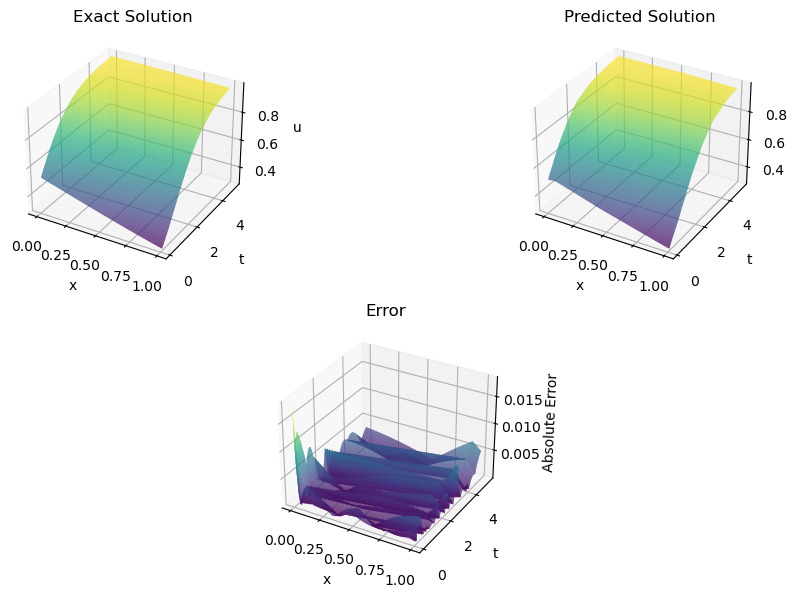

In [6]:
# Create a single figure with multiple subplots
fig = plt.figure(figsize=(12, 7))

# Plotting the 3D exact solution
ax_exact = fig.add_subplot(2, 2, 1, projection='3d')
ax_exact.plot_surface(X, T, u_exact, cmap='viridis', rstride=5, cstride=5)
ax_exact.set_title('Exact Solution')
ax_exact.set_xlabel('x')
ax_exact.set_ylabel('t')
ax_exact.set_zlabel('u')

# Plotting the 3D predicted solution
ax_pred = fig.add_subplot(2, 2, 2, projection='3d')
ax_pred.plot_surface(X, T, U_pred, cmap='viridis', rstride=5, cstride=5)
ax_pred.set_title('Predicted Solution')
ax_pred.set_xlabel('x')
ax_pred.set_ylabel('t')
ax_pred.set_zlabel('u')

# Plotting the 3D error
ax_error = fig.add_subplot(2, 1, 2, projection='3d')
ax_error.plot_surface(X, T, np.abs(u_exact - U_pred), cmap='viridis', rstride=5, cstride=5)
ax_error.set_title('Error')
ax_error.set_xlabel('x')
ax_error.set_ylabel('t')
ax_error.set_zlabel('Absolute Error')

plt.show()